### Permutations Significance Test

A common problem that one encounters when analyzing data is the need to compare samples of data, `sample_A` and `sample_B` in our case, in order to determine whether or not the observed samples are drawn from the same parent probability density function. Are the two samples that you are analyzing actually different from one another? One way to test for differences is to make some theoretical assumptions about the nature of the probability function of the null hypothesis. For example, if the null hypothesis is normally distributed then we can look at our observed samples and make some educated inferences about whether they are drawn from the same theoretcial null hypothesis distribution. It is often difficult to be confident in theoretical assumptions about your particular set of data. Often I find myself analyzing problem sets in which the underlying probability functions are not well understood, and do not lend themselves easily to theoretical assumptions. In these cases I use permutations testing. I have found this test to be practical, intuitive, and reasonably easy to implement with a little bit of custom code. I want to share my use of this test with you because I think it is powerful and widely applicable. 

##### Intuition and Terminology

Ok...permutations test. Well, permutations of what? The testing name refers to permutations of the null hypothesis. The null hypothesis is the hypothesis that your two observed samples are drawn from the same parent distribution and there are no significant differences between them. Under the null hypothesis, your two samples are two ways the null hypothesis could be observed. In other words they are two permutations of samples from the same larger parent distribution. If it is in fact true that we have two observed samples from the null hypothesis distribution, then we can create many more observations using re-sampling techniques. An assumption that must be met in order for a permutations test to be applicable is the observed data points must be exchangeable between the observed sample groups. In practice this means that there can't be any underlying reason why an observation in `sample_A` couldn't have also occured in `sample_B`. You can test any feature of the data that your wish including, mean difference, deviation, or t-score. For this purpose I will use the mean difference between the two samples. 

##### Steps and Methods

The steps to perform a permutations test are as follows:

1. Compare and log the observed mean difference between `sample_A` and `sample_B`.
2. Pool/Merge the observed data points from `sample_A` and `sample_B` into one set of data `null_observation`.
3. Recreate the two groups by randomly sampling without replacement from `null_observation` creating two new groups, `resample_A` and `resample_B`, and log the mean difference between the two resampled groups.
4. Repeat step 3 n times. In our case we will re-sample the data 1000 times.
5. Compare the mean differences collected from `resample_A` and `resample_B` to the mean difference obtained in step 1.

##### Example

(1000,) (1000,) (2000,)


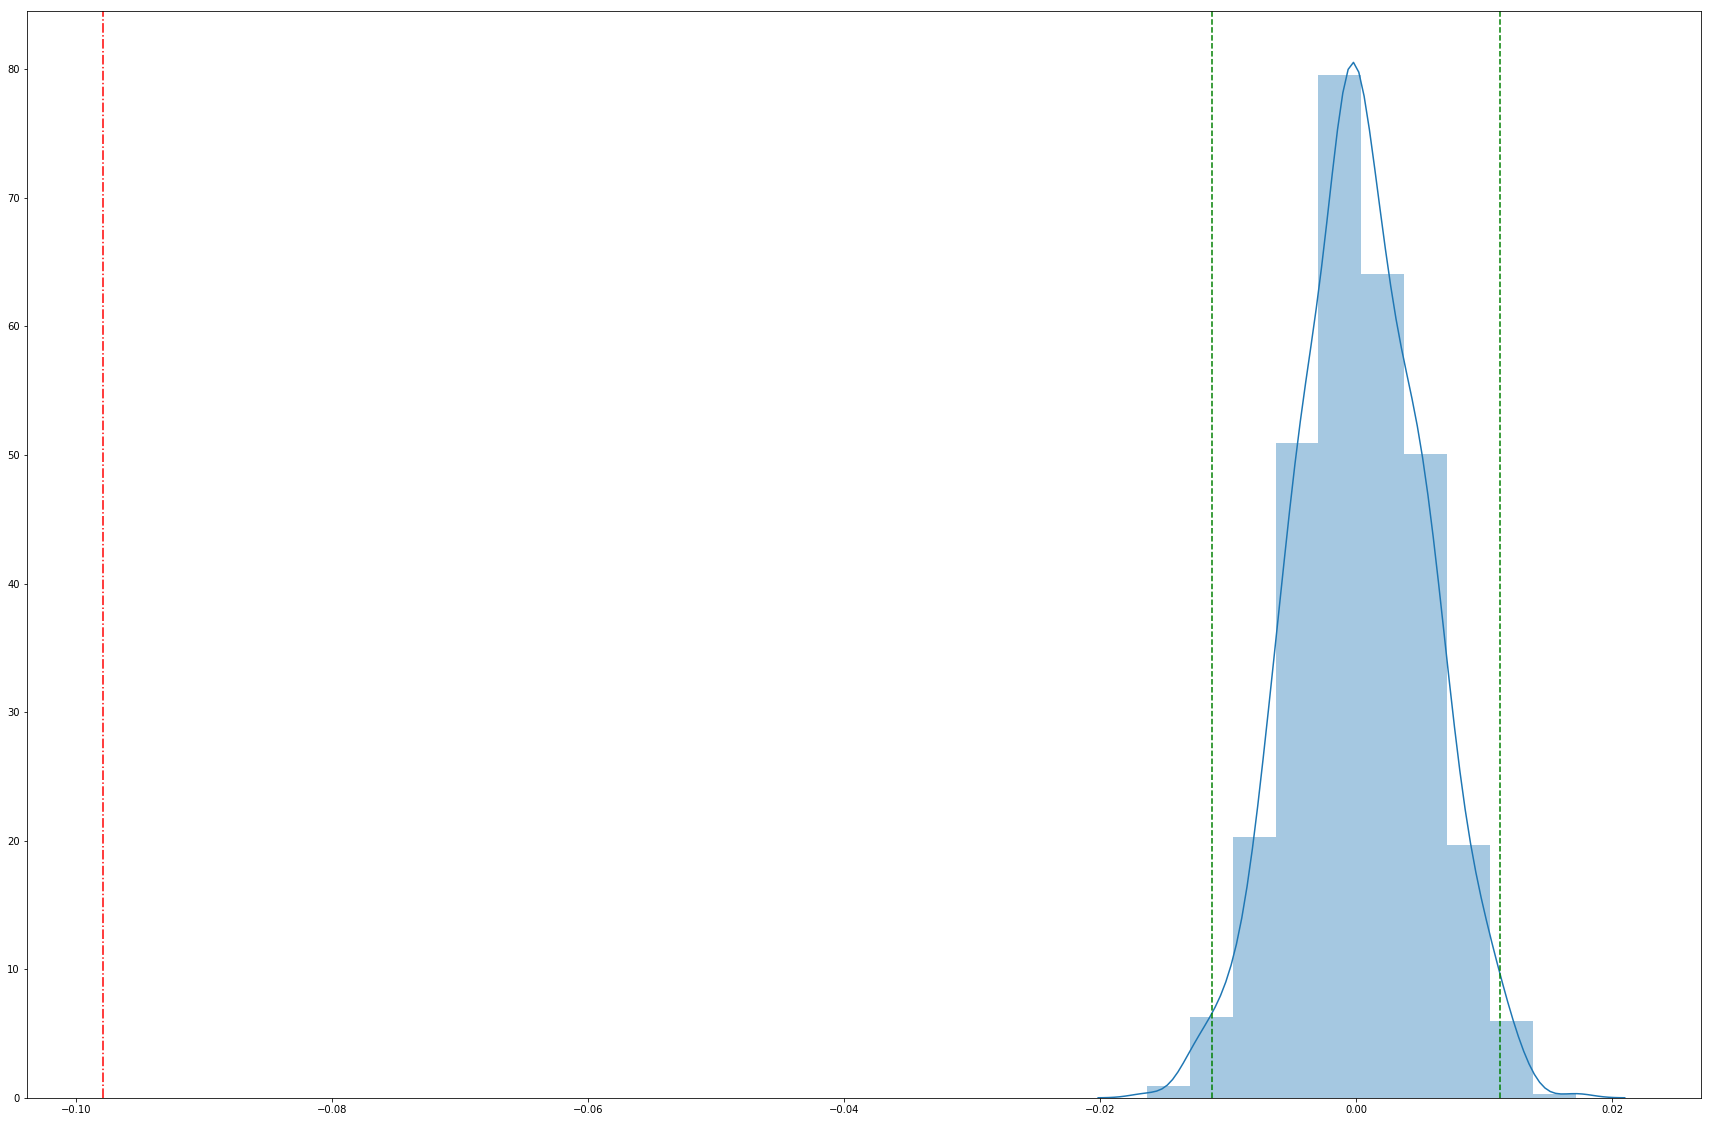

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Using the numpy normal distribution function where loc is the mean, 
# scale is the standard deviation, and size is the number of observations.

n_observations = 1000


# Make the distributions non-equal to see if the permutations test
# shows the difference.
sample_A = np.random.normal(
    loc=1, 
    scale=0.1, 
    size=n_observations,
)

sample_B = np.random.normal(
    loc=1.1, 
    scale=0.1,
    size=n_observations,
)

observed_mean_difference = np.mean(sample_A) - np.mean(sample_B)
null_observation = np.concatenate((sample_A, sample_B))

# Print the shapes of the above arrays to make sure everything is as expected
print(np.shape(sample_A),np.shape(sample_B), np.shape(null_observation))

def resample(input_array, output_size, n):
    
    sample_mean_differences = []
    
    for i in range(n):
        # Shuffle the null_observation array using numpy suffle method
        np.random.shuffle(input_array)

        resample_A, resample_B = input_array[:output_size], input_array[output_size:]

        sample_mean_differences.append(np.mean(resample_A) - np.mean(resample_B))
    
    return sample_mean_differences

sample_mean_differences = resample(
    input_array=null_observation,
    output_size=n_observations,
    n=1000
)

significance_cutoff = np.percentile(
    sample_mean_differences, 99
)

plt.figure(figsize=(30,20))

plot = sns.distplot( 
    a=sample_mean_differences,
    bins=10
)

plot.axvline(
    x=observed_mean_difference, 
    color='red', 
    linestyle='-.'
)

plot.axvline(
    x=significance_cutoff, 
    color='green', 
    linestyle='--'
)

plot.axvline(
    x=-significance_cutoff, 
    color='green', 
    linestyle='--'
)

##### Results

The red line is the observed mean difference. The green lines are the 99th percentile significance cutoffs. If the red line lies between the two green lines then the observed results are not significant. If the red line lies outside the green lines then the observed results are significant at p<=0.01. The above process can be repeated and the the p-values can be observed in order to understand how often the results are significant. 

Set the `sample_A` and `sample_B` distributions to be equal to each other to see what the results of the permutations test will show.